''

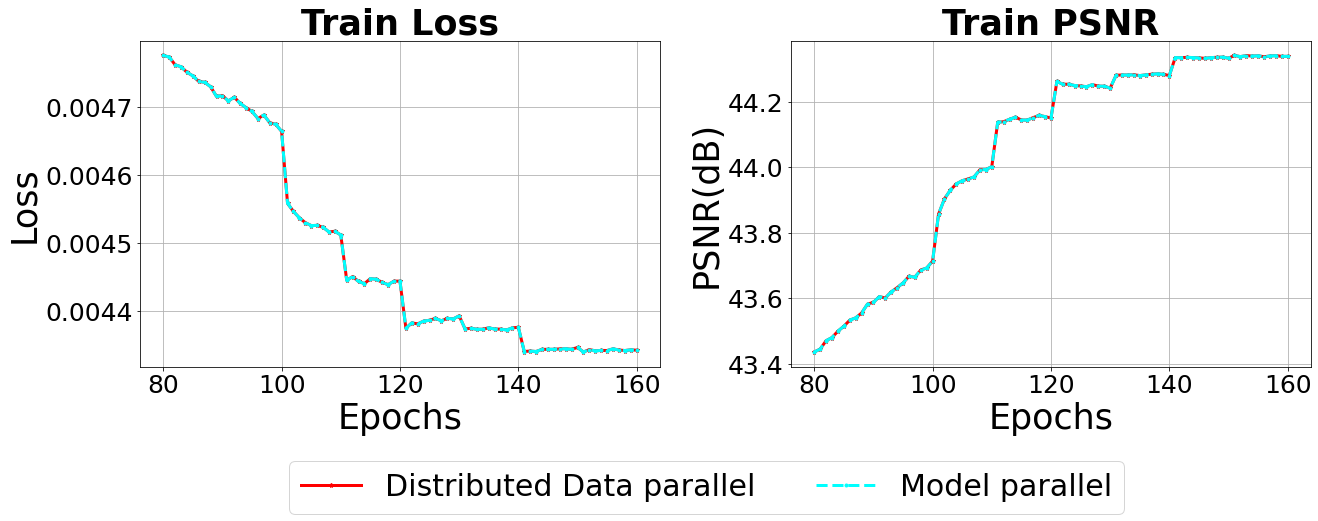

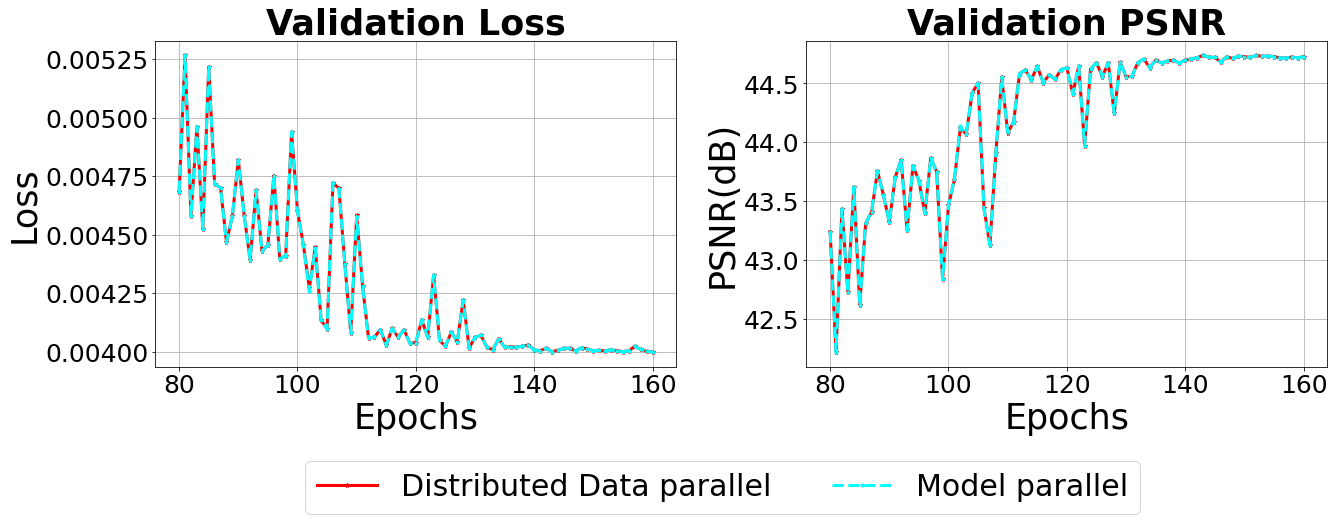

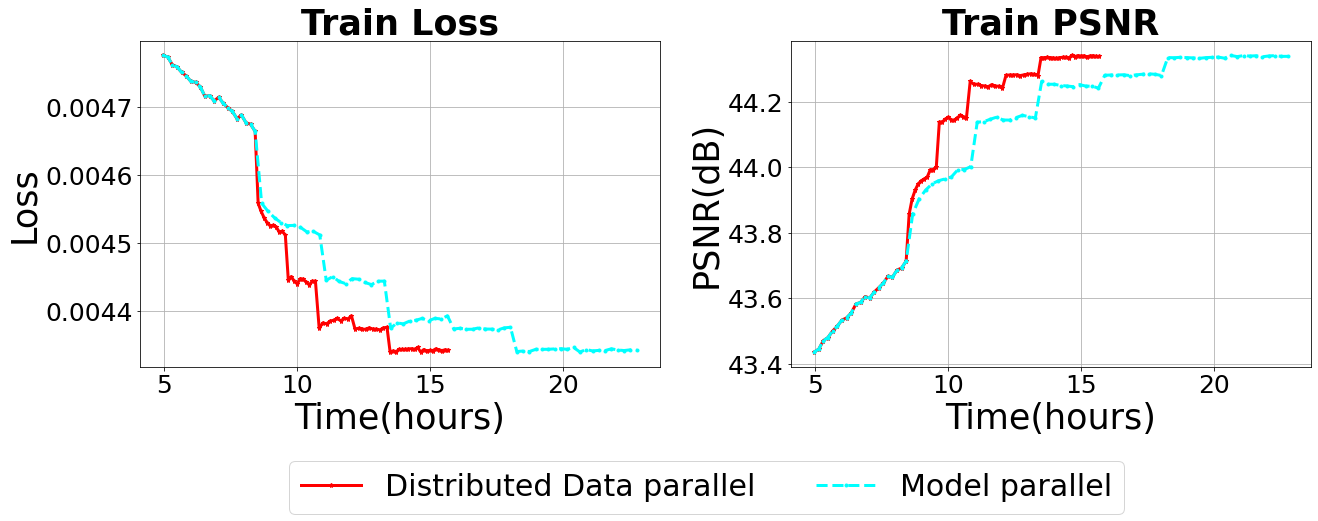

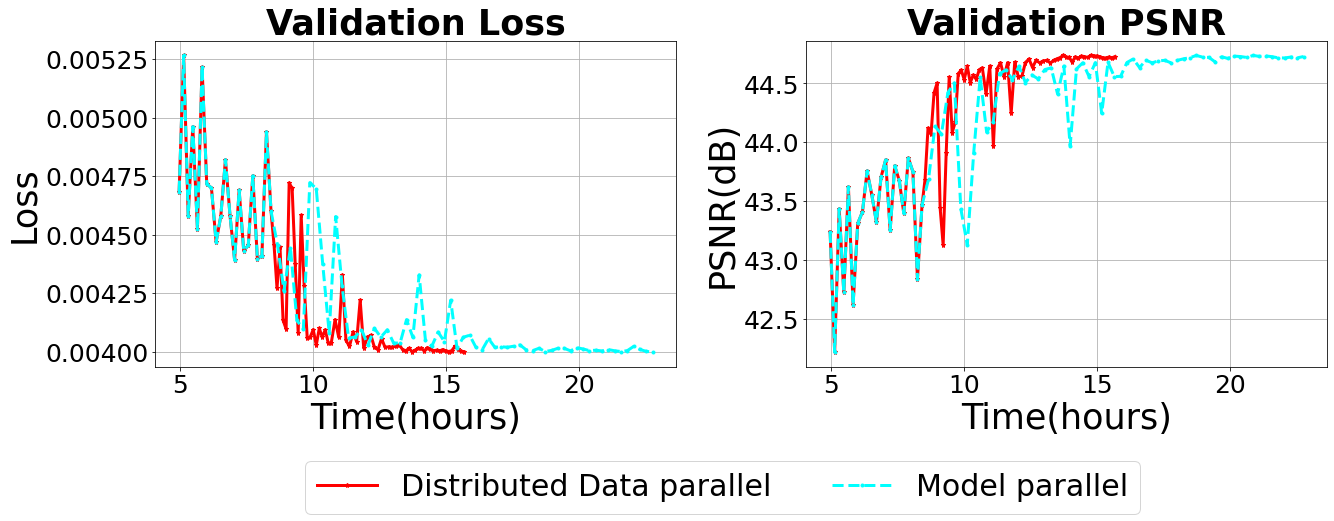

In [7]:
import sys
import os
from optparse import OptionParser
import numpy as np
import matplotlib.pyplot as plt

import csv
import time
ROOT_PATH = '/data03/hyun/MultiGPU/tr_res' #'/home/jisoo/jisoo_ws/Dataset'

fn_dp = 'C:/Users/USER/Desktop/model_parallel_data/exp_72_180_hybrid3_01_ddp_v2/tr_info/pytorch_metrics_160.csv'
fn_mp = 'C:/Users/USER/Desktop/model_parallel_data/exp_72_180_hybrid3_01_mp_v2/tr_info/pytorch_metrics_160.csv'

f_dp = open(fn_dp, 'r', encoding='utf-8')
f_mp = open(fn_mp, 'r', encoding='utf-8')

data1_dp = []
data2_dp = []
data3_dp = []
data4_dp = []
data5_dp = []
data6_dp = []

data1_mp = []
data2_mp = []
data3_mp = []
data4_mp = []
data5_mp = []
data6_mp = []

for line in csv.reader(f_dp):
    #print(line)
    data1_dp.append(float(line[0]))
    data2_dp.append(float(line[1]))
    data3_dp.append(float(line[2]))
    data4_dp.append(float(line[3]))
    data5_dp.append(float(line[4]))
    data6_dp.append(float(line[-1]))


for line in csv.reader(f_mp):
    data1_mp.append(float(line[0]))
    data2_mp.append(float(line[1]))
    data3_mp.append(float(line[2]))
    data4_mp.append(float(line[3]))
    data5_mp.append(float(line[4]))
    data6_mp.append(float(line[-1]))

args = [[data2_dp, data2_mp],[data3_dp, data3_mp],[data5_dp, data5_mp],[data4_dp, data4_mp],[data6_dp, data6_mp]]
line_styles = ['-*', '-o']
colors = ['red', 'cyan']

titles = ['Train Loss', 'Train PSNR', 'Validation Loss', 'Validation PSNR']
x_labels = ['Epochs', 'Epochs', 'Epochs', 'Epochs']
y_labels = ['Loss', 'PSRN(dB)', 'Loss', 'PSRN(dB)']


#print(args[-1])

#plt.figure(figsize=[18,11])
#plt.plot(range(80, 16, args[0][0][]))

""""""""""""""""""""""""""""""""""""""""""""""""""""""
""""""""""""""""""""" For Epoch """""""""""""""""""""
""""""""""""""""""""""""""""""""""""""""""""""""""""""
label_names = ['Distributed Data parallel', 'Model parallel']

fig = plt.figure(figsize=[21,6])
fig.subplots_adjust(wspace=0.25, hspace=0.4)
axes = fig.subplots(nrows=1, ncols=2)

axes[0].plot(range(80, 161), args[0][0][79:160], line_styles[0], color=colors[0], label=label_names[0], linewidth=3, markersize=5)
axes[0].plot(range(80, 161), args[0][1][79:160], '--o', color=colors[1], label=label_names[1], linewidth=3, markersize=3)

axes[0].set_title('Train Loss', fontsize=35, fontweight='bold')

axes[0].set_xlabel('Epochs', fontsize=35)
axes[0].set_ylabel('Loss', fontsize=35)
axes[0].tick_params(axis='both', which='major', labelsize=25)
axes[0].grid()
""""""""""""""""""""""""""""""""""""""""""""""""""""""

axes[1].plot(range(80, 161), args[1][0][79:160], line_styles[0], color=colors[0], label=label_names[0], linewidth=3, markersize=5)
axes[1].plot(range(80, 161), args[1][1][79:160], '--o', color=colors[1], label=label_names[1], linewidth=3, markersize=3)

axes[1].set_title('Train PSNR', fontsize=35, fontweight='bold')

axes[1].set_xlabel('Epochs', fontsize=35)
axes[1].set_ylabel('PSNR(dB)', fontsize=35)
axes[1].tick_params(axis='both', which='major', labelsize=25)
axes[1].grid()

lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(handles=lines, bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=6, fontsize=30)

""""""""""""""""""""""""""""""""""""""""""""""""""""""
""""""""""""""""""""""""""""""""""""""""""""""""""""""

label_names = ['Distributed Data parallel', 'Model parallel']

fig = plt.figure(figsize=[21,6])
fig.subplots_adjust(wspace=0.25, hspace=0.4)
axes = fig.subplots(nrows=1, ncols=2)

axes[0].plot(range(80, 161), args[2][0][79:160], line_styles[0], color=colors[0], label=label_names[0], linewidth=3, markersize=5)
axes[0].plot(range(80, 161), args[2][1][79:160], '--o', color=colors[1], label=label_names[1], linewidth=3, markersize=3)

axes[0].set_title('Validation Loss', fontsize=35, fontweight='bold')

axes[0].set_xlabel('Epochs', fontsize=35)
axes[0].set_ylabel('Loss', fontsize=35)
axes[0].tick_params(axis='both', which='major', labelsize=25)
axes[0].grid()
""""""""""""""""""""""""""""""""""""""""""""""""""""""

axes[1].plot(range(80, 161), args[3][0][79:160], line_styles[0], color=colors[0], label=label_names[0], linewidth=3, markersize=5)
axes[1].plot(range(80, 161), args[3][1][79:160], '--o', color=colors[1], label=label_names[1], linewidth=3, markersize=3)

axes[1].set_title('Validation PSNR', fontsize=35, fontweight='bold')

axes[1].set_xlabel('Epochs', fontsize=35)
axes[1].set_ylabel('PSNR(dB)', fontsize=35)
axes[1].tick_params(axis='both', which='major', labelsize=25)
axes[1].grid()

lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(handles=lines, bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=6, fontsize=30)

""""""""""""""""""""""""""""""""""""""""""""""""""""""
""""""""""""""""""""""""""""""""""""""""""""""""""""""



""""""""""""""""""""""""""""""""""""""""""""""""""""""
""""""""""""""""""""" For Time """""""""""""""""""""
""""""""""""""""""""""""""""""""""""""""""""""""""""""
label_names = ['Distributed Data parallel', 'Model parallel']

fig = plt.figure(figsize=[21,6])
fig.subplots_adjust(wspace=0.25, hspace=0.4)
axes = fig.subplots(nrows=1, ncols=2)

axes[0].plot(np.array(args[-1][0][79:160])/3600, args[0][0][79:160], line_styles[0], color=colors[0], label=label_names[0], linewidth=3, markersize=5)
axes[0].plot(np.array(args[-1][1][79:160])/3600, args[0][1][79:160], '--o', color=colors[1], label=label_names[1], linewidth=3, markersize=3)

axes[0].set_title('Train Loss', fontsize=35, fontweight='bold')

axes[0].set_xlabel('Time(hours)', fontsize=35)
axes[0].set_ylabel('Loss', fontsize=35)
axes[0].tick_params(axis='both', which='major', labelsize=25)
axes[0].grid()
""""""""""""""""""""""""""""""""""""""""""""""""""""""

axes[1].plot(np.array(args[-1][0][79:160])/3600, args[1][0][79:160], line_styles[0], color=colors[0], label=label_names[0], linewidth=3, markersize=5)
axes[1].plot(np.array(args[-1][1][79:160])/3600, args[1][1][79:160], '--o', color=colors[1], label=label_names[1], linewidth=3, markersize=3)

axes[1].set_title('Train PSNR', fontsize=35, fontweight='bold')

axes[1].set_xlabel('Time(hours)', fontsize=35)
axes[1].set_ylabel('PSNR(dB)', fontsize=35)
axes[1].tick_params(axis='both', which='major', labelsize=25)
axes[1].grid()

lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(handles=lines, bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=6, fontsize=30)






""""""""""""""""""""""""""""""""""""""""""""""""""""""
""""""""""""""""""""""""""""""""""""""""""""""""""""""

label_names = ['Distributed Data parallel', 'Model parallel']

fig = plt.figure(figsize=[21,6])
fig.subplots_adjust(wspace=0.25, hspace=0.4)
axes = fig.subplots(nrows=1, ncols=2)

axes[0].plot(np.array(args[-1][0][79:160])/3600, args[2][0][79:160], line_styles[0], color=colors[0], label=label_names[0], linewidth=3, markersize=5)
axes[0].plot(np.array(args[-1][1][79:160])/3600, args[2][1][79:160], '--o', color=colors[1], label=label_names[1], linewidth=3, markersize=3)

axes[0].set_title('Validation Loss', fontsize=35, fontweight='bold')

axes[0].set_xlabel('Time(hours)', fontsize=35)
axes[0].set_ylabel('Loss', fontsize=35)
axes[0].tick_params(axis='both', which='major', labelsize=25)
axes[0].grid()
""""""""""""""""""""""""""""""""""""""""""""""""""""""

axes[1].plot(np.array(args[-1][0][79:160])/3600, args[3][0][79:160], line_styles[0], color=colors[0], label=label_names[0], linewidth=3, markersize=5)
axes[1].plot(np.array(args[-1][1][79:160])/3600, args[3][1][79:160], '--o', color=colors[1], label=label_names[1], linewidth=3, markersize=3)

axes[1].set_title('Validation PSNR', fontsize=35, fontweight='bold')

axes[1].set_xlabel('Time(hours)', fontsize=35)
axes[1].set_ylabel('PSNR(dB)', fontsize=35)
axes[1].tick_params(axis='both', which='major', labelsize=25)
axes[1].grid()

lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(handles=lines, bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=6, fontsize=30)


""""""""""""""""""""""""""""""""""""""""""""""""""""""



''

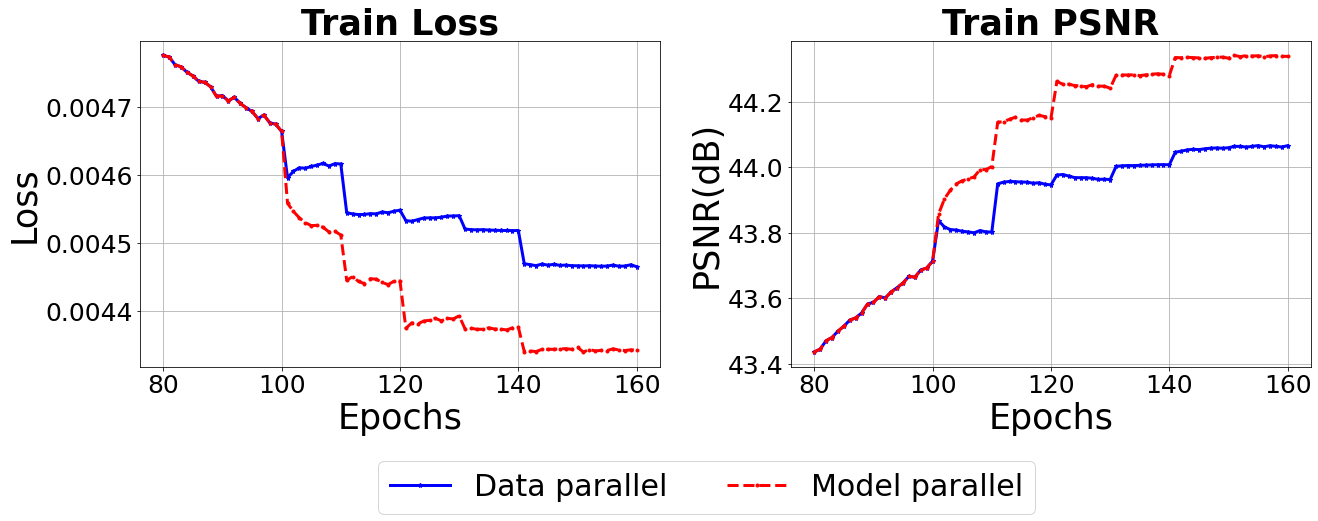

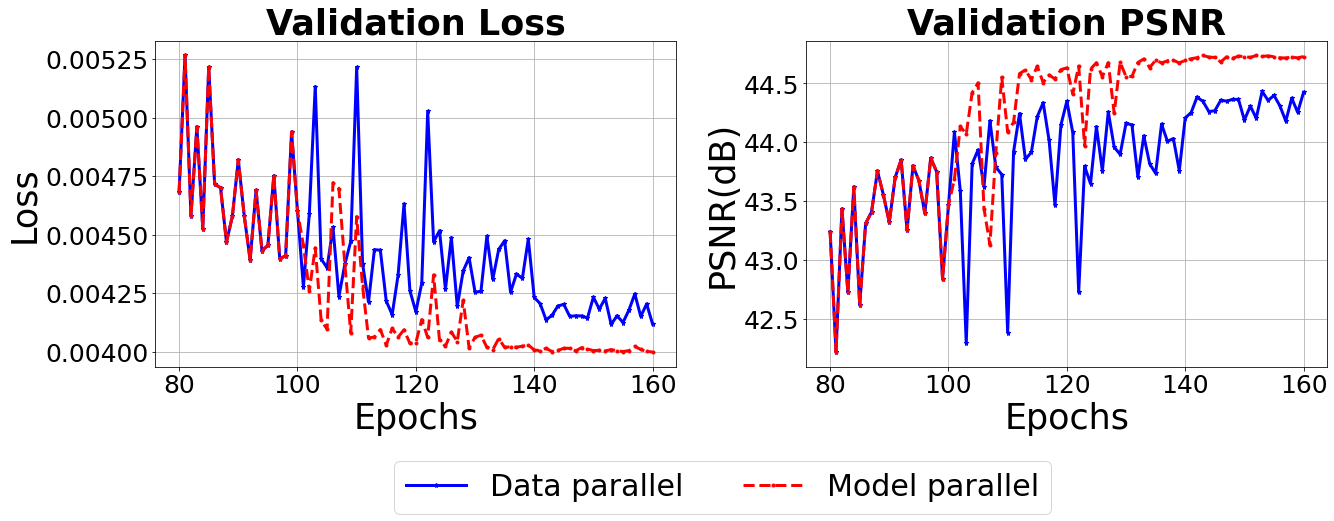

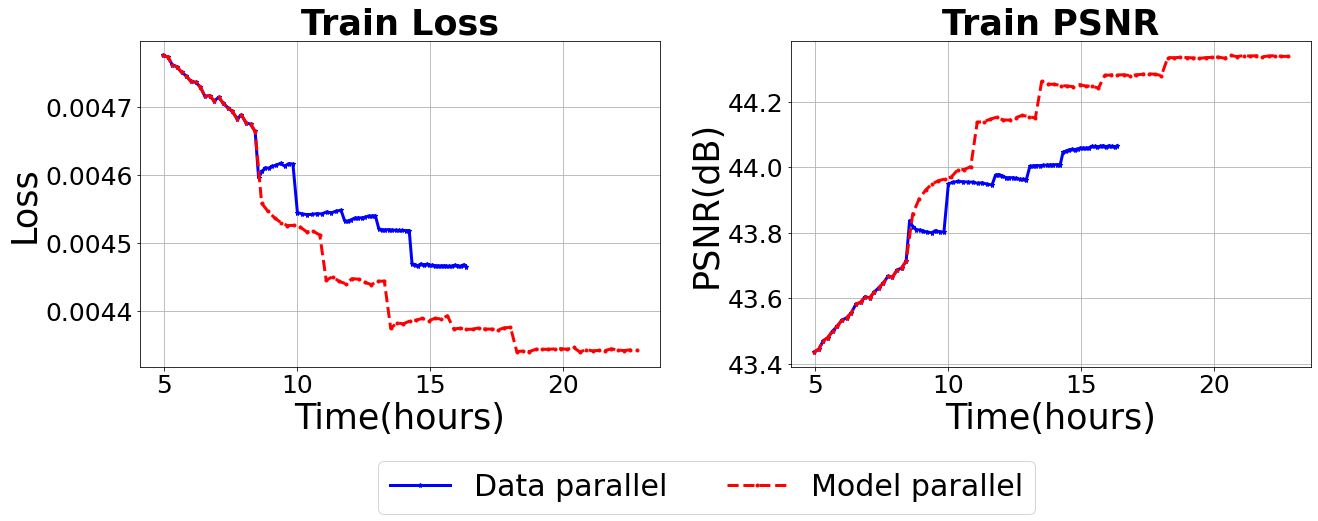

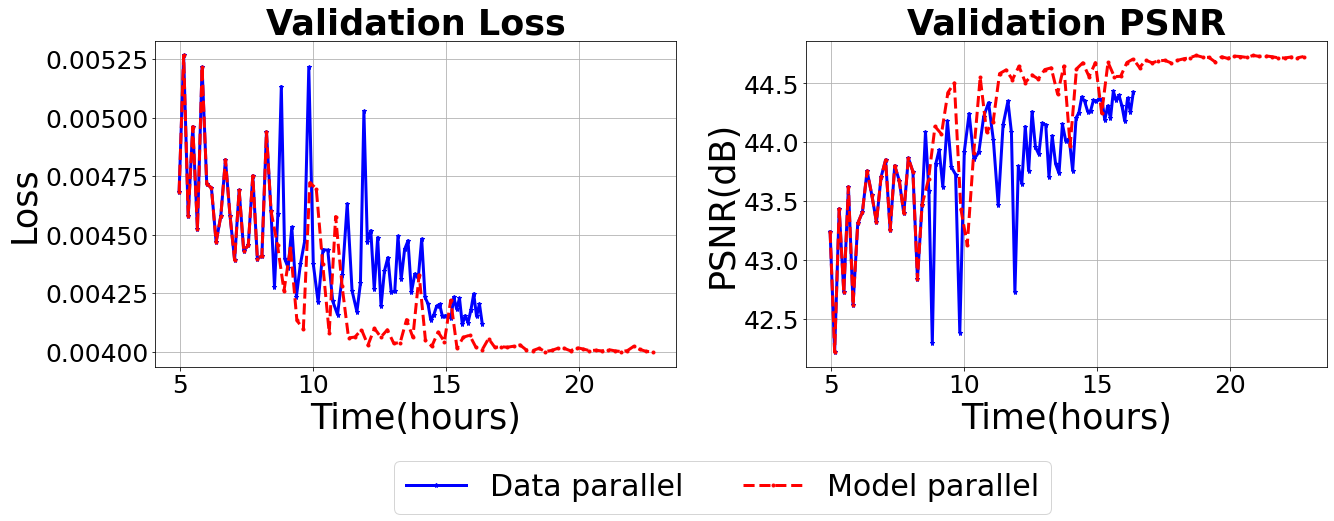

In [8]:
import sys
import os
from optparse import OptionParser
import numpy as np
import matplotlib.pyplot as plt

import csv
import time
ROOT_PATH = '/data02/hyun/MultiGPU/tr_res/AICAS_train_results_data' #'/home/jisoo/jisoo_ws/Dataset'

fn_dp = 'C:/Users/USER/Desktop/model_parallel_data/exp_72_180_hybrid3_01_dp_v2/tr_info/pytorch_metrics_160.csv'
fn_mp = 'C:/Users/USER/Desktop/model_parallel_data/exp_72_180_hybrid3_01_mp_v2/tr_info/pytorch_metrics_160.csv'

f_dp = open(fn_dp, 'r', encoding='utf-8')
f_mp = open(fn_mp, 'r', encoding='utf-8')

data1_dp = []
data2_dp = []
data3_dp = []
data4_dp = []
data5_dp = []
data6_dp = []

data1_mp = []
data2_mp = []
data3_mp = []
data4_mp = []
data5_mp = []
data6_mp = []

for line in csv.reader(f_dp):
    #print(line)
    data1_dp.append(float(line[0]))
    data2_dp.append(float(line[1]))
    data3_dp.append(float(line[2]))
    data4_dp.append(float(line[3]))
    data5_dp.append(float(line[4]))
    data6_dp.append(float(line[-1]))


for line in csv.reader(f_mp):
    data1_mp.append(float(line[0]))
    data2_mp.append(float(line[1]))
    data3_mp.append(float(line[2]))
    data4_mp.append(float(line[3]))
    data5_mp.append(float(line[4]))
    data6_mp.append(float(line[-1]))

args = [[data2_dp, data2_mp],[data3_dp, data3_mp],[data5_dp, data5_mp],[data4_dp, data4_mp],[data6_dp, data6_mp]]
line_styles = ['-*', '-o']
colors = ['blue', 'red']

titles = ['Train Loss', 'Train PSNR', 'Validation Loss', 'Validation PSNR']
x_labels = ['Epochs', 'Epochs', 'Epochs', 'Epochs']
y_labels = ['Loss', 'PSRN(dB)', 'Loss', 'PSRN(dB)']


#print(args[-1])

#plt.figure(figsize=[18,11])
#plt.plot(range(80, 16, args[0][0][]))

""""""""""""""""""""""""""""""""""""""""""""""""""""""
""""""""""""""""""""" For Epoch """""""""""""""""""""
""""""""""""""""""""""""""""""""""""""""""""""""""""""
label_names = ['Data parallel', 'Model parallel']

fig = plt.figure(figsize=[21,6])
fig.subplots_adjust(wspace=0.25, hspace=0.4)
axes = fig.subplots(nrows=1, ncols=2)

axes[0].plot(range(80, 161), args[0][0][79:160], line_styles[0], color=colors[0], label=label_names[0], linewidth=3, markersize=5)
axes[0].plot(range(80, 161), args[0][1][79:160], '--o', color=colors[1], label=label_names[1], linewidth=3, markersize=3)

axes[0].set_title('Train Loss', fontsize=35, fontweight='bold')

axes[0].set_xlabel('Epochs', fontsize=35)
axes[0].set_ylabel('Loss', fontsize=35)
axes[0].tick_params(axis='both', which='major', labelsize=25)
axes[0].grid()
""""""""""""""""""""""""""""""""""""""""""""""""""""""

axes[1].plot(range(80, 161), args[1][0][79:160], line_styles[0], color=colors[0], label=label_names[0], linewidth=3, markersize=5)
axes[1].plot(range(80, 161), args[1][1][79:160], '--o', color=colors[1], label=label_names[1], linewidth=3, markersize=3)

axes[1].set_title('Train PSNR', fontsize=35, fontweight='bold')

axes[1].set_xlabel('Epochs', fontsize=35)
axes[1].set_ylabel('PSNR(dB)', fontsize=35)
axes[1].tick_params(axis='both', which='major', labelsize=25)
axes[1].grid()

lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(handles=lines, bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=6, fontsize=30)

""""""""""""""""""""""""""""""""""""""""""""""""""""""
""""""""""""""""""""""""""""""""""""""""""""""""""""""

label_names = ['Data parallel', 'Model parallel']

fig = plt.figure(figsize=[21,6])
fig.subplots_adjust(wspace=0.25, hspace=0.4)
axes = fig.subplots(nrows=1, ncols=2)

axes[0].plot(range(80, 161), args[2][0][79:160], line_styles[0], color=colors[0], label=label_names[0], linewidth=3, markersize=5)
axes[0].plot(range(80, 161), args[2][1][79:160], '--o', color=colors[1], label=label_names[1], linewidth=3, markersize=3)

axes[0].set_title('Validation Loss', fontsize=35, fontweight='bold')

axes[0].set_xlabel('Epochs', fontsize=35)
axes[0].set_ylabel('Loss', fontsize=35)
axes[0].tick_params(axis='both', which='major', labelsize=25)
axes[0].grid()
""""""""""""""""""""""""""""""""""""""""""""""""""""""

axes[1].plot(range(80, 161), args[3][0][79:160], line_styles[0], color=colors[0], label=label_names[0], linewidth=3, markersize=5)
axes[1].plot(range(80, 161), args[3][1][79:160], '--o', color=colors[1], label=label_names[1], linewidth=3, markersize=3)

axes[1].set_title('Validation PSNR', fontsize=35, fontweight='bold')

axes[1].set_xlabel('Epochs', fontsize=35)
axes[1].set_ylabel('PSNR(dB)', fontsize=35)
axes[1].tick_params(axis='both', which='major', labelsize=25)
axes[1].grid()

lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(handles=lines, bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=6, fontsize=30)

""""""""""""""""""""""""""""""""""""""""""""""""""""""
""""""""""""""""""""""""""""""""""""""""""""""""""""""



""""""""""""""""""""""""""""""""""""""""""""""""""""""
""""""""""""""""""""" For Time """""""""""""""""""""
""""""""""""""""""""""""""""""""""""""""""""""""""""""
label_names = ['Data parallel', 'Model parallel']

fig = plt.figure(figsize=[21,6])
fig.subplots_adjust(wspace=0.25, hspace=0.4)
axes = fig.subplots(nrows=1, ncols=2)

axes[0].plot(np.array(args[-1][0][79:160])/3600, args[0][0][79:160], line_styles[0], color=colors[0], label=label_names[0], linewidth=3, markersize=5)
axes[0].plot(np.array(args[-1][1][79:160])/3600, args[0][1][79:160], '--o', color=colors[1], label=label_names[1], linewidth=3, markersize=3)

axes[0].set_title('Train Loss', fontsize=35, fontweight='bold')

axes[0].set_xlabel('Time(hours)', fontsize=35)
axes[0].set_ylabel('Loss', fontsize=35)
axes[0].tick_params(axis='both', which='major', labelsize=25)
axes[0].grid()
""""""""""""""""""""""""""""""""""""""""""""""""""""""

axes[1].plot(np.array(args[-1][0][79:160])/3600, args[1][0][79:160], line_styles[0], color=colors[0], label=label_names[0], linewidth=3, markersize=5)
axes[1].plot(np.array(args[-1][1][79:160])/3600, args[1][1][79:160], '--o', color=colors[1], label=label_names[1], linewidth=3, markersize=3)

axes[1].set_title('Train PSNR', fontsize=35, fontweight='bold')

axes[1].set_xlabel('Time(hours)', fontsize=35)
axes[1].set_ylabel('PSNR(dB)', fontsize=35)
axes[1].tick_params(axis='both', which='major', labelsize=25)
axes[1].grid()

lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(handles=lines, bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=6, fontsize=30)






""""""""""""""""""""""""""""""""""""""""""""""""""""""
""""""""""""""""""""""""""""""""""""""""""""""""""""""

label_names = ['Data parallel', 'Model parallel']

fig = plt.figure(figsize=[21,6])
fig.subplots_adjust(wspace=0.25, hspace=0.4)
axes = fig.subplots(nrows=1, ncols=2)

axes[0].plot(np.array(args[-1][0][79:160])/3600, args[2][0][79:160], line_styles[0], color=colors[0], label=label_names[0], linewidth=3, markersize=5)
axes[0].plot(np.array(args[-1][1][79:160])/3600, args[2][1][79:160], '--o', color=colors[1], label=label_names[1], linewidth=3, markersize=3)

axes[0].set_title('Validation Loss', fontsize=35, fontweight='bold')

axes[0].set_xlabel('Time(hours)', fontsize=35)
axes[0].set_ylabel('Loss', fontsize=35)
axes[0].tick_params(axis='both', which='major', labelsize=25)
axes[0].grid()
""""""""""""""""""""""""""""""""""""""""""""""""""""""

axes[1].plot(np.array(args[-1][0][79:160])/3600, args[3][0][79:160], line_styles[0], color=colors[0], label=label_names[0], linewidth=3, markersize=5)
axes[1].plot(np.array(args[-1][1][79:160])/3600, args[3][1][79:160], '--o', color=colors[1], label=label_names[1], linewidth=3, markersize=3)

axes[1].set_title('Validation PSNR', fontsize=35, fontweight='bold')

axes[1].set_xlabel('Time(hours)', fontsize=35)
axes[1].set_ylabel('PSNR(dB)', fontsize=35)
axes[1].tick_params(axis='both', which='major', labelsize=25)
axes[1].grid()

lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(handles=lines, bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=6, fontsize=30)


""""""""""""""""""""""""""""""""""""""""""""""""""""""


''

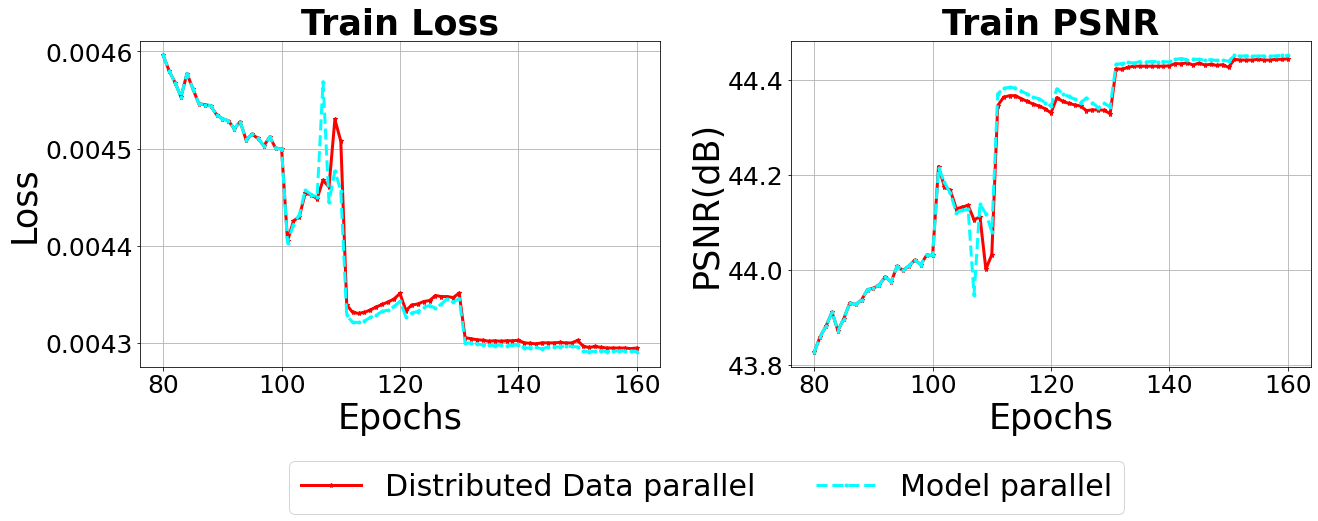

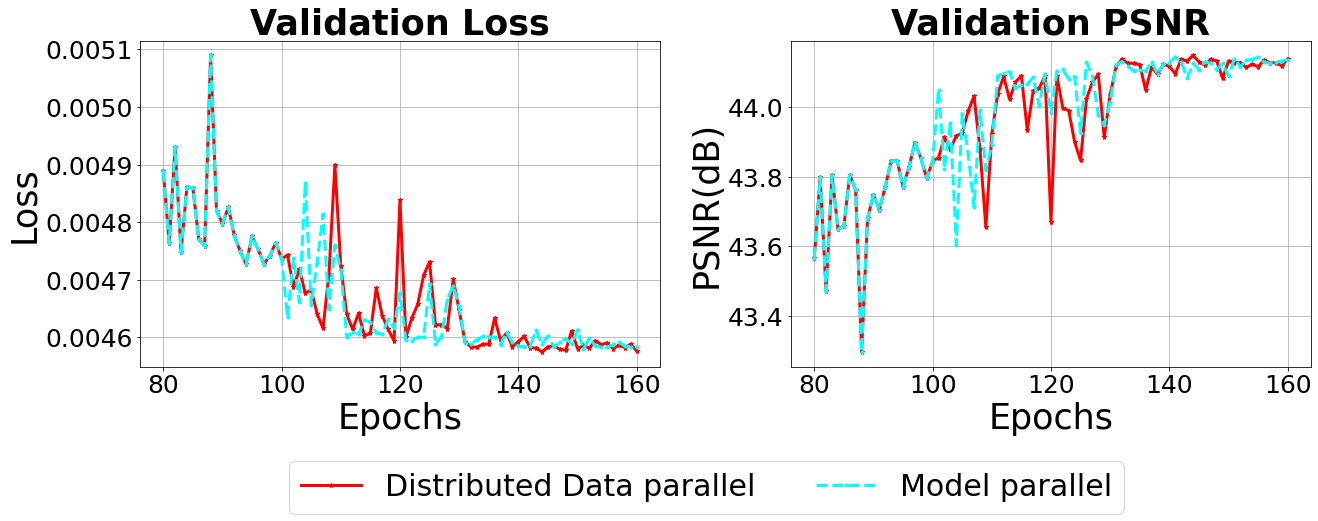

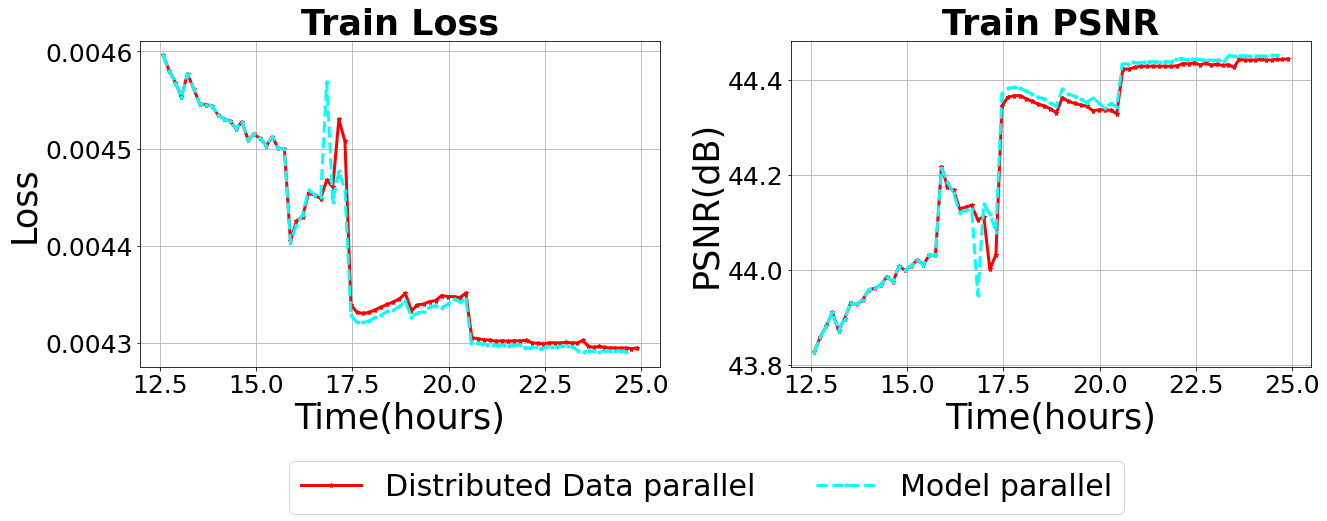

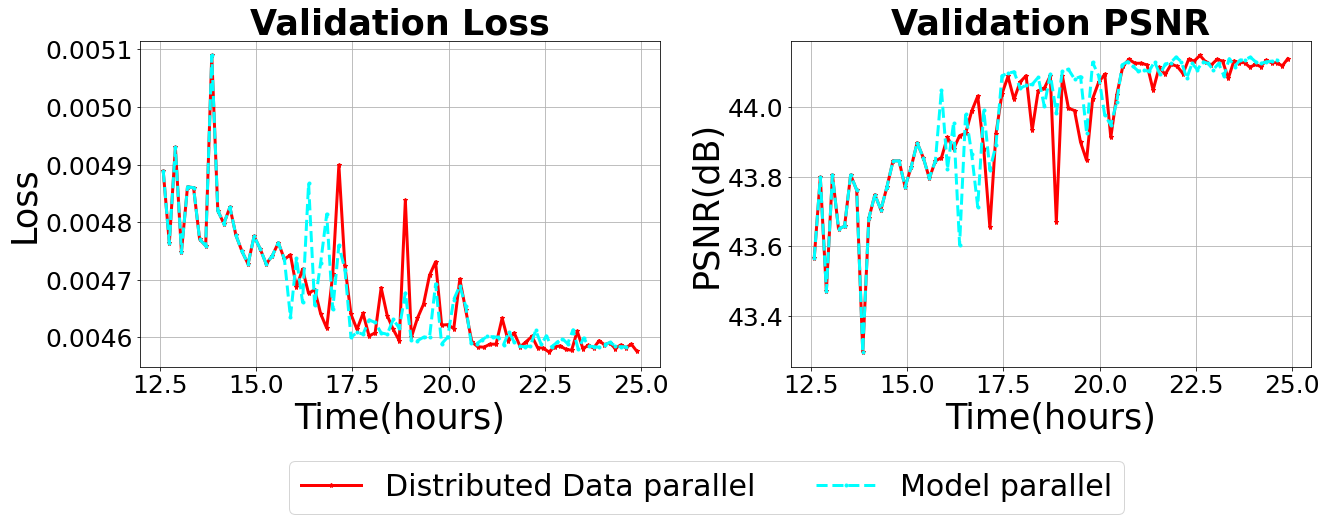

In [6]:
import sys
import os
from optparse import OptionParser
import numpy as np
import matplotlib.pyplot as plt

import csv
import time
ROOT_PATH = '/data03/hyun/MultiGPU/tr_res' #'/home/jisoo/jisoo_ws/Dataset'

fn_dp = 'C:/Users/USER/Desktop/model_parallel_data/exp_72_180_hybrid3_01_dp_GN/tr_info/pytorch_metrics_160.csv'
fn_mp = 'C:/Users/USER/Desktop/model_parallel_data/exp_72_180_hybrid3_01_mp_GN/tr_info/pytorch_metrics_160.csv'

f_dp = open(fn_dp, 'r', encoding='utf-8')
f_mp = open(fn_mp, 'r', encoding='utf-8')

data1_dp = []
data2_dp = []
data3_dp = []
data4_dp = []
data5_dp = []
data6_dp = []

data1_mp = []
data2_mp = []
data3_mp = []
data4_mp = []
data5_mp = []
data6_mp = []

for line in csv.reader(f_dp):
    #print(line)
    data1_dp.append(float(line[0]))
    data2_dp.append(float(line[1]))
    data3_dp.append(float(line[2]))
    data4_dp.append(float(line[3]))
    data5_dp.append(float(line[4]))
    data6_dp.append(float(line[-1]))


for line in csv.reader(f_mp):
    data1_mp.append(float(line[0]))
    data2_mp.append(float(line[1]))
    data3_mp.append(float(line[2]))
    data4_mp.append(float(line[3]))
    data5_mp.append(float(line[4]))
    data6_mp.append(float(line[-1]))

args = [[data2_dp, data2_mp],[data3_dp, data3_mp],[data5_dp, data5_mp],[data4_dp, data4_mp],[data6_dp, data6_mp]]
line_styles = ['-*', '-o']
colors = ['red', 'cyan']

titles = ['Train Loss', 'Train PSNR', 'Validation Loss', 'Validation PSNR']
x_labels = ['Epochs', 'Epochs', 'Epochs', 'Epochs']
y_labels = ['Loss', 'PSRN(dB)', 'Loss', 'PSRN(dB)']


#print(args[-1])

#plt.figure(figsize=[18,11])
#plt.plot(range(80, 16, args[0][0][]))

""""""""""""""""""""""""""""""""""""""""""""""""""""""
""""""""""""""""""""" For Epoch """""""""""""""""""""
""""""""""""""""""""""""""""""""""""""""""""""""""""""
label_names = ['Distributed Data parallel', 'Model parallel']

fig = plt.figure(figsize=[21,6])
fig.subplots_adjust(wspace=0.25, hspace=0.4)
axes = fig.subplots(nrows=1, ncols=2)

axes[0].plot(range(80, 161), args[0][0][79:160], line_styles[0], color=colors[0], label=label_names[0], linewidth=3, markersize=5)
axes[0].plot(range(80, 161), args[0][1][79:160], '--o', color=colors[1], label=label_names[1], linewidth=3, markersize=3)

axes[0].set_title('Train Loss', fontsize=35, fontweight='bold')

axes[0].set_xlabel('Epochs', fontsize=35)
axes[0].set_ylabel('Loss', fontsize=35)
axes[0].tick_params(axis='both', which='major', labelsize=25)
axes[0].grid()
""""""""""""""""""""""""""""""""""""""""""""""""""""""

axes[1].plot(range(80, 161), args[1][0][79:160], line_styles[0], color=colors[0], label=label_names[0], linewidth=3, markersize=5)
axes[1].plot(range(80, 161), args[1][1][79:160], '--o', color=colors[1], label=label_names[1], linewidth=3, markersize=3)

axes[1].set_title('Train PSNR', fontsize=35, fontweight='bold')

axes[1].set_xlabel('Epochs', fontsize=35)
axes[1].set_ylabel('PSNR(dB)', fontsize=35)
axes[1].tick_params(axis='both', which='major', labelsize=25)
axes[1].grid()

lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(handles=lines, bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=6, fontsize=30)

""""""""""""""""""""""""""""""""""""""""""""""""""""""
""""""""""""""""""""""""""""""""""""""""""""""""""""""

label_names = ['Distributed Data parallel', 'Model parallel']

fig = plt.figure(figsize=[21,6])
fig.subplots_adjust(wspace=0.25, hspace=0.4)
axes = fig.subplots(nrows=1, ncols=2)

axes[0].plot(range(80, 161), args[2][0][79:160], line_styles[0], color=colors[0], label=label_names[0], linewidth=3, markersize=5)
axes[0].plot(range(80, 161), args[2][1][79:160], '--o', color=colors[1], label=label_names[1], linewidth=3, markersize=3)

axes[0].set_title('Validation Loss', fontsize=35, fontweight='bold')

axes[0].set_xlabel('Epochs', fontsize=35)
axes[0].set_ylabel('Loss', fontsize=35)
axes[0].tick_params(axis='both', which='major', labelsize=25)
axes[0].grid()
""""""""""""""""""""""""""""""""""""""""""""""""""""""

axes[1].plot(range(80, 161), args[3][0][79:160], line_styles[0], color=colors[0], label=label_names[0], linewidth=3, markersize=5)
axes[1].plot(range(80, 161), args[3][1][79:160], '--o', color=colors[1], label=label_names[1], linewidth=3, markersize=3)

axes[1].set_title('Validation PSNR', fontsize=35, fontweight='bold')

axes[1].set_xlabel('Epochs', fontsize=35)
axes[1].set_ylabel('PSNR(dB)', fontsize=35)
axes[1].tick_params(axis='both', which='major', labelsize=25)
axes[1].grid()

lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(handles=lines, bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=6, fontsize=30)

""""""""""""""""""""""""""""""""""""""""""""""""""""""
""""""""""""""""""""""""""""""""""""""""""""""""""""""



""""""""""""""""""""""""""""""""""""""""""""""""""""""
""""""""""""""""""""" For Time """""""""""""""""""""
""""""""""""""""""""""""""""""""""""""""""""""""""""""
label_names = ['Distributed Data parallel', 'Model parallel']

fig = plt.figure(figsize=[21,6])
fig.subplots_adjust(wspace=0.25, hspace=0.4)
axes = fig.subplots(nrows=1, ncols=2)

axes[0].plot(np.array(args[-1][0][79:160])/3600, args[0][0][79:160], line_styles[0], color=colors[0], label=label_names[0], linewidth=3, markersize=5)
axes[0].plot(np.array(args[-1][1][79:160])/3600, args[0][1][79:160], '--o', color=colors[1], label=label_names[1], linewidth=3, markersize=3)

axes[0].set_title('Train Loss', fontsize=35, fontweight='bold')

axes[0].set_xlabel('Time(hours)', fontsize=35)
axes[0].set_ylabel('Loss', fontsize=35)
axes[0].tick_params(axis='both', which='major', labelsize=25)
axes[0].grid()
""""""""""""""""""""""""""""""""""""""""""""""""""""""

axes[1].plot(np.array(args[-1][0][79:160])/3600, args[1][0][79:160], line_styles[0], color=colors[0], label=label_names[0], linewidth=3, markersize=5)
axes[1].plot(np.array(args[-1][1][79:160])/3600, args[1][1][79:160], '--o', color=colors[1], label=label_names[1], linewidth=3, markersize=3)

axes[1].set_title('Train PSNR', fontsize=35, fontweight='bold')

axes[1].set_xlabel('Time(hours)', fontsize=35)
axes[1].set_ylabel('PSNR(dB)', fontsize=35)
axes[1].tick_params(axis='both', which='major', labelsize=25)
axes[1].grid()

lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(handles=lines, bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=6, fontsize=30)






""""""""""""""""""""""""""""""""""""""""""""""""""""""
""""""""""""""""""""""""""""""""""""""""""""""""""""""

label_names = ['Distributed Data parallel', 'Model parallel']

fig = plt.figure(figsize=[21,6])
fig.subplots_adjust(wspace=0.25, hspace=0.4)
axes = fig.subplots(nrows=1, ncols=2)

axes[0].plot(np.array(args[-1][0][79:160])/3600, args[2][0][79:160], line_styles[0], color=colors[0], label=label_names[0], linewidth=3, markersize=5)
axes[0].plot(np.array(args[-1][1][79:160])/3600, args[2][1][79:160], '--o', color=colors[1], label=label_names[1], linewidth=3, markersize=3)

axes[0].set_title('Validation Loss', fontsize=35, fontweight='bold')

axes[0].set_xlabel('Time(hours)', fontsize=35)
axes[0].set_ylabel('Loss', fontsize=35)
axes[0].tick_params(axis='both', which='major', labelsize=25)
axes[0].grid()
""""""""""""""""""""""""""""""""""""""""""""""""""""""

axes[1].plot(np.array(args[-1][0][79:160])/3600, args[3][0][79:160], line_styles[0], color=colors[0], label=label_names[0], linewidth=3, markersize=5)
axes[1].plot(np.array(args[-1][1][79:160])/3600, args[3][1][79:160], '--o', color=colors[1], label=label_names[1], linewidth=3, markersize=3)

axes[1].set_title('Validation PSNR', fontsize=35, fontweight='bold')

axes[1].set_xlabel('Time(hours)', fontsize=35)
axes[1].set_ylabel('PSNR(dB)', fontsize=35)
axes[1].tick_params(axis='both', which='major', labelsize=25)
axes[1].grid()

lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(handles=lines, bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=6, fontsize=30)


""""""""""""""""""""""""""""""""""""""""""""""""""""""


''

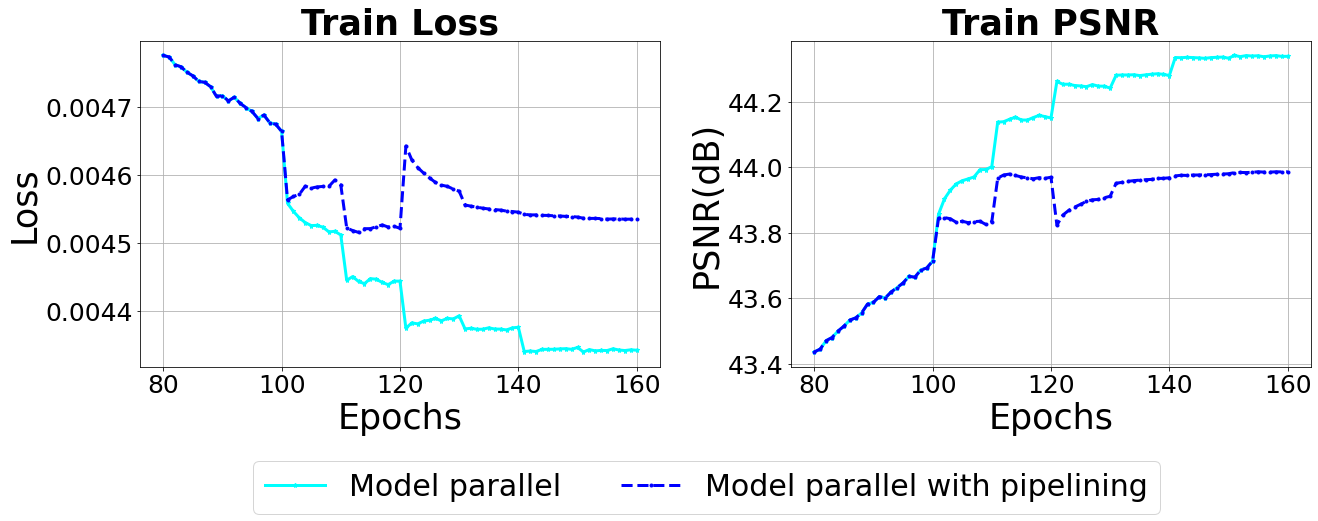

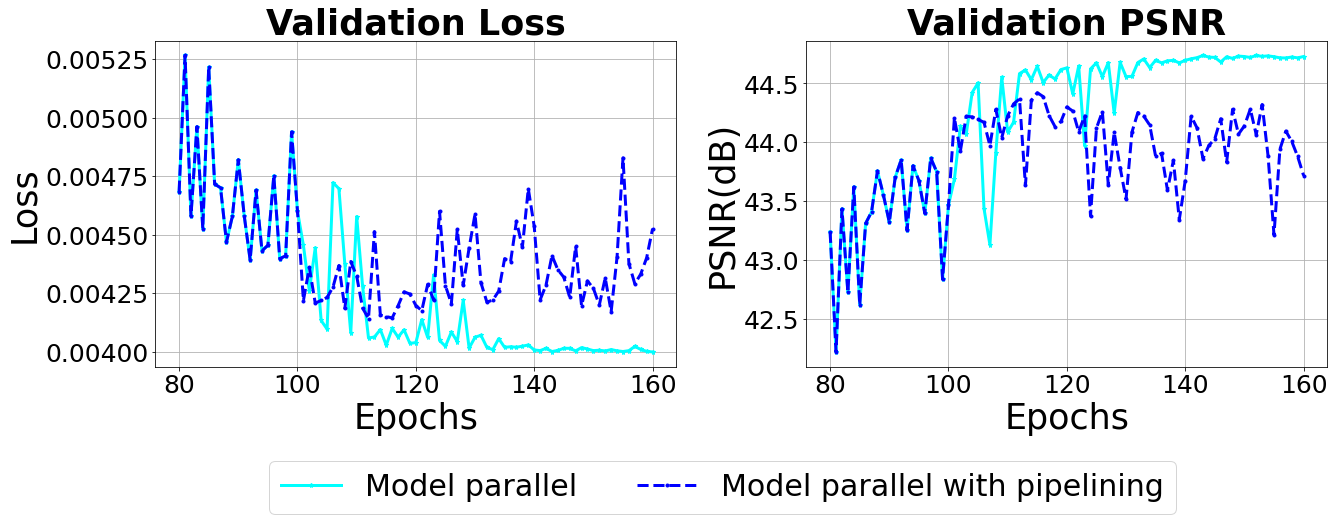

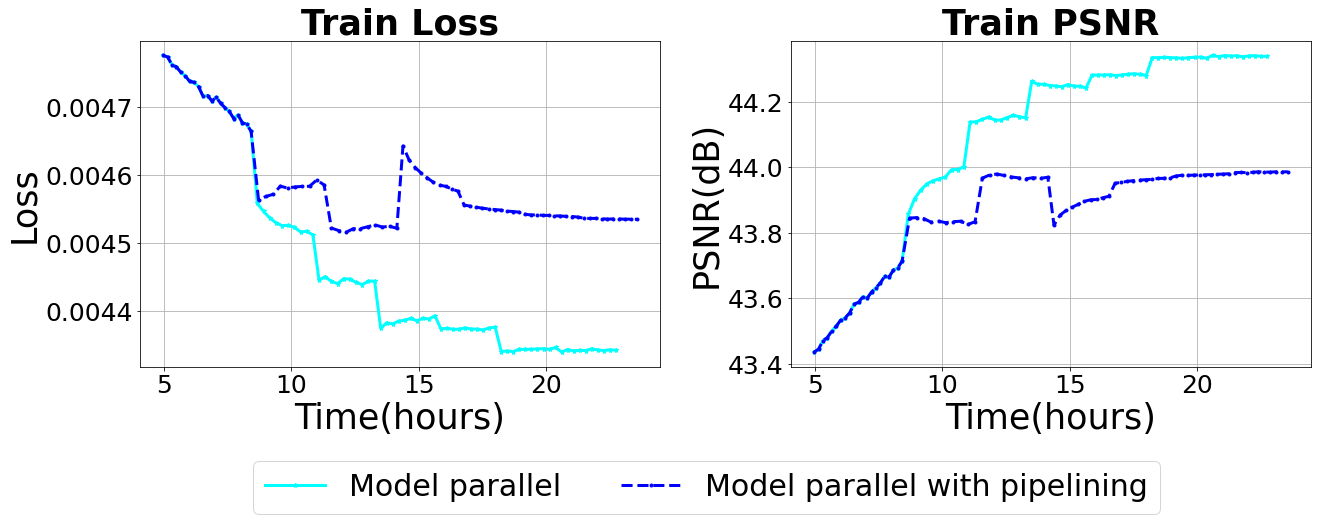

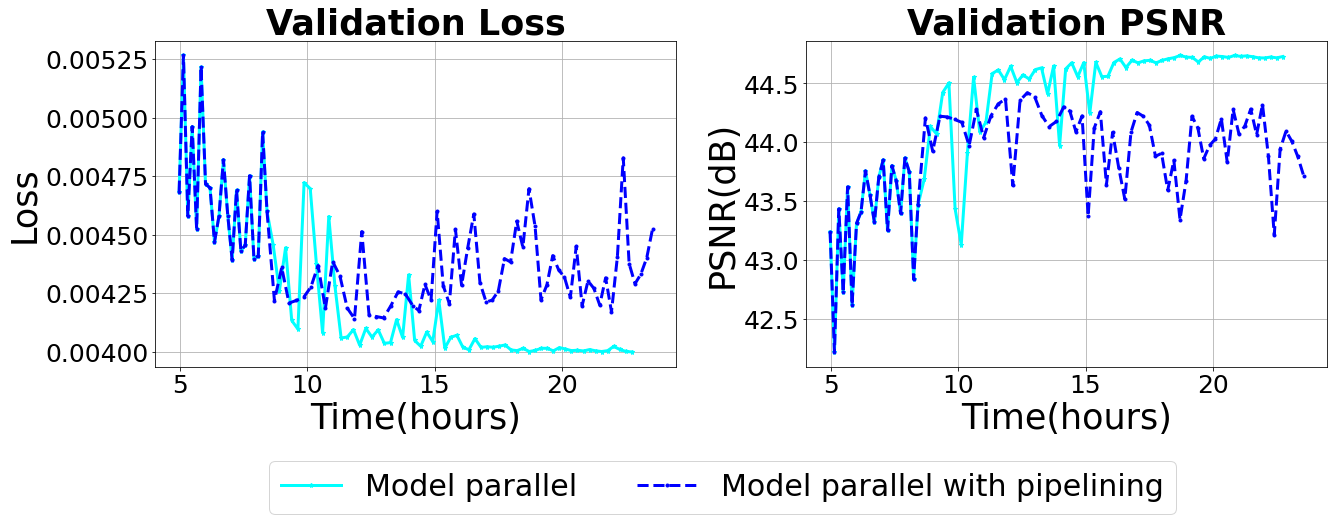

In [5]:
import sys
import os
from optparse import OptionParser
import numpy as np
import matplotlib.pyplot as plt

import csv
import time
ROOT_PATH = '/home/ldlqudgus756/multiGPU/data/tr_res/' #'/home/jisoo/jisoo_ws/Dataset'
ROOT_PATH = "C:/Users/USER/Desktop/multiGPU_data"

#fn_dp = os.path.join(ROOT_PATH, 'exp_base_extend/subexp_hybrid_2_hybrid5_1_0.01_dp/tr_info/pytorch_metrics_240.csv')
#fn_dp = os.path.join(ROOT_PATH, 'exp_base_extend/subexp_hybrid_ddp_hybrid5_1_0.01_ddp/tr_info/pytorch_metrics_200.csv')
#fn_mp = os.path.join(ROOT_PATH, 'exp_base_extend/subexp_hybrid_ddp_hybrid5_1_0.01_ddp/tr_info/pytorch_metrics_200.csv')

#fn_dp = '/data02/hyun/MultiGPU/tr_res/exp_base/exp_72_180
fn_dp = 'C:/Users/USER/Desktop/model_parallel_data/exp_72_180_hybrid3_01_mp_v2/tr_info/pytorch_metrics_160.csv'
fn_mp = 'C:/Users/USER/Desktop/model_parallel_data/exp_72_180_hybrid3_01_mp_pipe_v2/tr_info/pytorch_metrics_160.csv'

f_dp = open(fn_dp, 'r', encoding='utf-8')
f_mp = open(fn_mp, 'r', encoding='utf-8')

data1_dp = []
data2_dp = []
data3_dp = []
data4_dp = []
data5_dp = []
data6_dp = []

data1_mp = []
data2_mp = []
data3_mp = []
data4_mp = []
data5_mp = []
data6_mp = []

for line in csv.reader(f_dp):
    #print(line)
    data1_dp.append(float(line[0]))
    data2_dp.append(float(line[1]))
    data3_dp.append(float(line[2]))
    data4_dp.append(float(line[3]))
    data5_dp.append(float(line[4]))
    data6_dp.append(float(line[-1]))


for line in csv.reader(f_mp):
    data1_mp.append(float(line[0]))
    data2_mp.append(float(line[1]))
    data3_mp.append(float(line[2]))
    data4_mp.append(float(line[3]))
    data5_mp.append(float(line[4]))
    data6_mp.append(float(line[-1]))

args = [[data2_dp, data2_mp],[data3_dp, data3_mp],[data5_dp, data5_mp],[data4_dp, data4_mp],[data6_dp, data6_mp]]
line_styles = ['-*', '-o']
colors = ['cyan', 'blue']

titles = ['Train Loss', 'Train PSNR', 'Validation Loss', 'Validation PSNR']
x_labels = ['Epochs', 'Epochs', 'Epochs', 'Epochs']
y_labels = ['Loss', 'PSRN(dB)', 'Loss', 'PSRN(dB)']


#print(args[-1])

#plt.figure(figsize=[18,11])
#plt.plot(range(80, 16, args[0][0][]))

""""""""""""""""""""""""""""""""""""""""""""""""""""""
""""""""""""""""""""" For Epoch """""""""""""""""""""
""""""""""""""""""""""""""""""""""""""""""""""""""""""
label_names = ['Model parallel', 'Model parallel with pipelining']

fig = plt.figure(figsize=[21,6])
fig.subplots_adjust(wspace=0.25, hspace=0.4)
axes = fig.subplots(nrows=1, ncols=2)

axes[0].plot(range(80, 161), args[0][0][79:160], line_styles[0], color=colors[0], label=label_names[0], linewidth=3, markersize=5)
axes[0].plot(range(80, 161), args[0][1][79:160], '--o', color=colors[1], label=label_names[1], linewidth=3, markersize=3)

axes[0].set_title('Train Loss', fontsize=35, fontweight='bold')

axes[0].set_xlabel('Epochs', fontsize=35)
axes[0].set_ylabel('Loss', fontsize=35)
axes[0].tick_params(axis='both', which='major', labelsize=25)
axes[0].grid()
""""""""""""""""""""""""""""""""""""""""""""""""""""""

axes[1].plot(range(80, 161), args[1][0][79:160], line_styles[0], color=colors[0], label=label_names[0], linewidth=3, markersize=5)
axes[1].plot(range(80, 161), args[1][1][79:160], '--o', color=colors[1], label=label_names[1], linewidth=3, markersize=3)

axes[1].set_title('Train PSNR', fontsize=35, fontweight='bold')

axes[1].set_xlabel('Epochs', fontsize=35)
axes[1].set_ylabel('PSNR(dB)', fontsize=35)
axes[1].tick_params(axis='both', which='major', labelsize=25)
axes[1].grid()

lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(handles=lines, bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=6, fontsize=30)

""""""""""""""""""""""""""""""""""""""""""""""""""""""
""""""""""""""""""""""""""""""""""""""""""""""""""""""

label_names = ['Model parallel', 'Model parallel with pipelining']

fig = plt.figure(figsize=[21,6])
fig.subplots_adjust(wspace=0.25, hspace=0.4)
axes = fig.subplots(nrows=1, ncols=2)

axes[0].plot(range(80, 161), args[2][0][79:160], line_styles[0], color=colors[0], label=label_names[0], linewidth=3, markersize=5)
axes[0].plot(range(80, 161), args[2][1][79:160], '--o', color=colors[1], label=label_names[1], linewidth=3, markersize=3)

axes[0].set_title('Validation Loss', fontsize=35, fontweight='bold')

axes[0].set_xlabel('Epochs', fontsize=35)
axes[0].set_ylabel('Loss', fontsize=35)
axes[0].tick_params(axis='both', which='major', labelsize=25)
axes[0].grid()
""""""""""""""""""""""""""""""""""""""""""""""""""""""

axes[1].plot(range(80, 161), args[3][0][79:160], line_styles[0], color=colors[0], label=label_names[0], linewidth=3, markersize=5)
axes[1].plot(range(80, 161), args[3][1][79:160], '--o', color=colors[1], label=label_names[1], linewidth=3, markersize=3)

axes[1].set_title('Validation PSNR', fontsize=35, fontweight='bold')

axes[1].set_xlabel('Epochs', fontsize=35)
axes[1].set_ylabel('PSNR(dB)', fontsize=35)
axes[1].tick_params(axis='both', which='major', labelsize=25)
axes[1].grid()

lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(handles=lines, bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=6, fontsize=30)

""""""""""""""""""""""""""""""""""""""""""""""""""""""
""""""""""""""""""""""""""""""""""""""""""""""""""""""



""""""""""""""""""""""""""""""""""""""""""""""""""""""
""""""""""""""""""""" For Time """""""""""""""""""""
""""""""""""""""""""""""""""""""""""""""""""""""""""""
label_names = ['Model parallel', 'Model parallel with pipelining']

fig = plt.figure(figsize=[21,6])
fig.subplots_adjust(wspace=0.25, hspace=0.4)
axes = fig.subplots(nrows=1, ncols=2)

axes[0].plot(np.array(args[-1][0][79:160])/3600, args[0][0][79:160], line_styles[0], color=colors[0], label=label_names[0], linewidth=3, markersize=5)
axes[0].plot(np.array(args[-1][1][79:160])/3600, args[0][1][79:160], '--o', color=colors[1], label=label_names[1], linewidth=3, markersize=3)

axes[0].set_title('Train Loss', fontsize=35, fontweight='bold')

axes[0].set_xlabel('Time(hours)', fontsize=35)
axes[0].set_ylabel('Loss', fontsize=35)
axes[0].tick_params(axis='both', which='major', labelsize=25)
axes[0].grid()
""""""""""""""""""""""""""""""""""""""""""""""""""""""

axes[1].plot(np.array(args[-1][0][79:160])/3600, args[1][0][79:160], line_styles[0], color=colors[0], label=label_names[0], linewidth=3, markersize=5)
axes[1].plot(np.array(args[-1][1][79:160])/3600, args[1][1][79:160], '--o', color=colors[1], label=label_names[1], linewidth=3, markersize=3)

axes[1].set_title('Train PSNR', fontsize=35, fontweight='bold')

axes[1].set_xlabel('Time(hours)', fontsize=35)
axes[1].set_ylabel('PSNR(dB)', fontsize=35)
axes[1].tick_params(axis='both', which='major', labelsize=25)
axes[1].grid()

lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(handles=lines, bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=6, fontsize=30)






""""""""""""""""""""""""""""""""""""""""""""""""""""""
""""""""""""""""""""""""""""""""""""""""""""""""""""""

label_names = ['Model parallel', 'Model parallel with pipelining']

fig = plt.figure(figsize=[21,6])
fig.subplots_adjust(wspace=0.25, hspace=0.4)
axes = fig.subplots(nrows=1, ncols=2)

axes[0].plot(np.array(args[-1][0][79:160])/3600, args[2][0][79:160], line_styles[0], color=colors[0], label=label_names[0], linewidth=3, markersize=5)
axes[0].plot(np.array(args[-1][1][79:160])/3600, args[2][1][79:160], '--o', color=colors[1], label=label_names[1], linewidth=3, markersize=3)

axes[0].set_title('Validation Loss', fontsize=35, fontweight='bold')

axes[0].set_xlabel('Time(hours)', fontsize=35)
axes[0].set_ylabel('Loss', fontsize=35)
axes[0].tick_params(axis='both', which='major', labelsize=25)
axes[0].grid()
""""""""""""""""""""""""""""""""""""""""""""""""""""""

axes[1].plot(np.array(args[-1][0][79:160])/3600, args[3][0][79:160], line_styles[0], color=colors[0], label=label_names[0], linewidth=3, markersize=5)
axes[1].plot(np.array(args[-1][1][79:160])/3600, args[3][1][79:160], '--o', color=colors[1], label=label_names[1], linewidth=3, markersize=3)

axes[1].set_title('Validation PSNR', fontsize=35, fontweight='bold')

axes[1].set_xlabel('Time(hours)', fontsize=35)
axes[1].set_ylabel('PSNR(dB)', fontsize=35)
axes[1].tick_params(axis='both', which='major', labelsize=25)
axes[1].grid()

lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(handles=lines, bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=6, fontsize=30)


""""""""""""""""""""""""""""""""""""""""""""""""""""""
